# Bikeshare Ridership (2017 Q1)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('brq1.csv')
df.head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 00:00,1/1/2017 00:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 00:00,1/1/2017 00:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 00:05,1/1/2017 00:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 00:07,1/1/2017 00:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 00:08,1/1/2017 00:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


### Mencari tahu berapa persentase sepeda kembali ke lokasi awalnya?

In [3]:
station = df[df['from_station_id'] == df['to_station_id']]
station

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
64,712447,1/1/2017 04:15,1/1/2017 04:25,625,7003,Madison Ave / Bloor St W,7003,Madison Ave / Bloor St W,Member
100,712484,1/1/2017 06:42,1/1/2017 06:44,79,7060,Princess St / Adelaide St,7060,Princess St / Adelaide St,Member
125,712510,1/1/2017 09:57,1/1/2017 10:03,359,7100,Dundas St E / Regent Park Blvd,7100,Dundas St E / Regent Park Blvd,Member
192,712580,1/1/2017 17:03,1/1/2017 17:36,1961,7018,Bremner Blvd / Rees St,7018,Bremner Blvd / Rees St,Casual
198,712586,1/1/2017 17:08,1/1/2017 18:36,5295,7016,Bay St / Queens Quay W (Ferry Terminal),7016,Bay St / Queens Quay W (Ferry Terminal),Casual
...,...,...,...,...,...,...,...,...,...
131744,868250,31/3/2017 17:04,31/3/2017 17:10,339,7007,College St W / Huron St,7007,College St W / Huron St,Member
131798,868307,31/3/2017 18:08,31/3/2017 18:21,813,7022,Simcoe St / Queen St W,7022,Simcoe St / Queen St W,Member
131814,868324,31/3/2017 18:33,31/3/2017 18:54,1267,7010,King St W / Spadina Ave,7010,King St W / Spadina Ave,Member
131841,868352,31/3/2017 19:13,31/3/2017 19:15,82,7007,College St W / Huron St,7007,College St W / Huron St,Member


In [4]:
total =  len(df)
jumlah = len(station)
persentase = jumlah / total * 100
persentase

1.1723923919378156

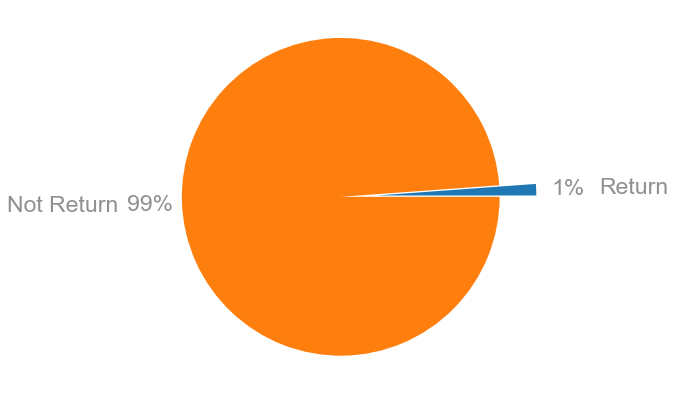

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7,7))
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['font.size']=23
labels = ['Return', 'Not Return']
color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
percentages = [jumlah, total]
explode=(0.12,0.111)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal');

### Berapa banyak perjalanan bikeshare biasanya mengunjungi lebih dari sekadar titik awal / akhir, tetapi mengunjungi beberapa poin lain sebelum penghujung hari?

In [6]:
df.columns

Index(['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'user_type'],
      dtype='object')

In [7]:
df_time = df[['trip_start_time', 'trip_stop_time', 'trip_duration_seconds']]
df_time.head()

,trip_start_time,trip_stop_time,trip_duration_seconds
0,1/1/2017 00:00,1/1/2017 00:03,223
1,1/1/2017 00:00,1/1/2017 00:05,279
2,1/1/2017 00:05,1/1/2017 00:29,1394
3,1/1/2017 00:07,1/1/2017 00:21,826
4,1/1/2017 00:08,1/1/2017 00:12,279


### Jumlah stasiun keberangkatan

In [14]:
df["from_station_name"].value_counts().head()

Union Station                      2408
Bay St / College St (East Side)    2159
Simcoe St / Wellington St W        2091
King St W / Spadina Ave            2023
Dundas St / Yonge St               2005
Name: from_station_name, dtype: int64

### Jumlah stasiun tujuan

In [15]:
df["to_station_name"].value_counts().head()

Union Station                      3493
Simcoe St / Wellington St W        2679
Dundas St / Yonge St               2270
King St W / Spadina Ave            2179
Bay St / College St (East Side)    2154
Name: to_station_name, dtype: int64

### Member dan Casual

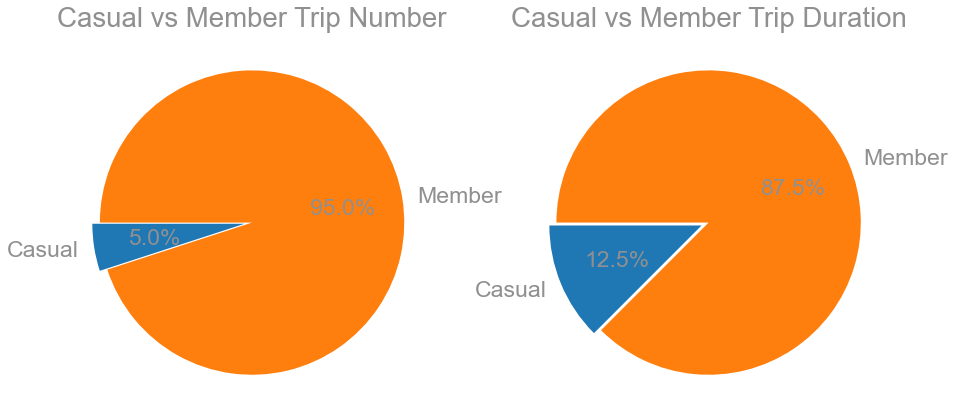

In [16]:
df['counter'] = 1
user = df.groupby(['user_type']).sum()

plt.figure(figsize=(15,15));
plt.subplot(1,2,1)
plt.pie(user.counter.values, startangle=180, labels=user.index, autopct='%.1f%%', explode=(.05,0));
plt.title('Casual vs Member Trip Number');
plt.xlabel
plt.subplot(1,2,2)
plt.pie(user.trip_duration_seconds.values, startangle=180, labels=user.index, autopct='%.1f%%', explode=(.05,0));
plt.title('Casual vs Member Trip Duration');

In [17]:
df.columns

Index(['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'user_type', 'counter'],
      dtype='object')

In [25]:
dele = df.drop(['counter'], axis=1)

### Korelasi

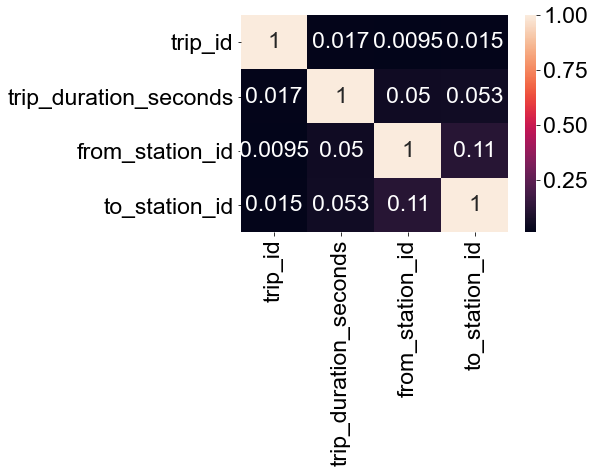

In [28]:
import seaborn as sns

corrMatrix = dele.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()